# Image text classification

### Necessary libraries

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from skimage import io
from scipy import misc
import os
import matplotlib.pyplot as plt
from skimage import color
import keras
from keras.layers import Conv2D, MaxPooling2D,Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.models import Sequential

C:\Users\Ilyas\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### I. Loading data :

Examples of images from dataset:


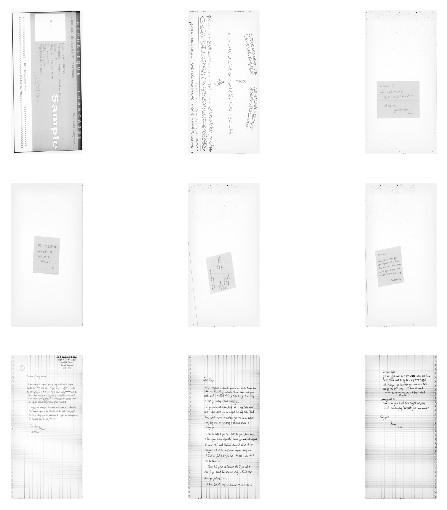

In [2]:
data = np.load('C:/Users/Ilyas/Desktop/M2 SID - SD/TER/data.npz')

Xtrain = data['Xtrain']
Xdev = data['Xdev']
ytrain = data['ytrain_class']
ydev = data['ydev_class']

print('Examples of images from dataset:')
# Plot the results
plt.figure(figsize=(9,9))
for i, image in enumerate(Xtrain[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image, cmap=plt.cm.gray,
               interpolation='nearest')
    plt.axis('off')
    plt.xticks(())
    plt.yticks(())
plt.show()

### II. CNN Model

In [4]:
def cnn_model(num_classes,input_shape):
    
    model = Sequential()
    
    model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(4, 4)))
    model.add(Dropout(0.3))

    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    model.add(Flatten())
    
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
    return model

### III. Class classification

In [10]:
# Reshape X_test and X_train
img_rows, img_cols = 500, 250
Xtrain = Xtrain.reshape(Xtrain.shape[0], img_rows, img_cols, 1)
Xdev = Xdev.reshape(Xdev.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# Convert class vectors to binary class matrices
num_classes = 5
ytrain = keras.utils.to_categorical(ytrain, num_classes)
ydev = keras.utils.to_categorical(ydev, num_classes)

# Training model
batch_size = 16
epochs = 20
model = cnn_model(num_classes,input_shape)
model.fit(Xtrain, ytrain, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(Xdev, ydev))

Train on 5483 samples, validate on 1110 samples
Epoch 1/20
5483/5483 [==============================] - 354s 64ms/step - loss: 1.2389 - acc: 0.5388 - val_loss: 1.0119 - val_acc: 0.6703
Epoch 2/20
5483/5483 [==============================] - 372s 68ms/step - loss: 0.8561 - acc: 0.6761 - val_loss: 0.8090 - val_acc: 0.7342
Epoch 3/20
5483/5483 [==============================] - 353s 64ms/step - loss: 0.6853 - acc: 0.7563 - val_loss: 0.6485 - val_acc: 0.7901
Epoch 4/20
5483/5483 [==============================] - 239s 44ms/step - loss: 0.5751 - acc: 0.7899 - val_loss: 0.5336 - val_acc: 0.8153
Epoch 5/20
5483/5483 [==============================] - 234s 43ms/step - loss: 0.5089 - acc: 0.8233 - val_loss: 0.5034 - val_acc: 0.8351
Epoch 6/20
5483/5483 [==============================] - 292s 53ms/step - loss: 0.4381 - acc: 0.8446 - val_loss: 0.5148 - val_acc: 0.8189
Epoch 7/20
5483/5483 [==============================] - 292s 53ms/step - loss: 0.4009 - acc: 0.8581 - val_loss: 0.4902 - val_acc: 

### IV. Language classification

In [8]:
ytrain = data['ytrain_language']
ydev = data['ydev_language']
# Convert class vectors to binary class matrices
num_classes = 3
ytrain = keras.utils.to_categorical(ytrain, num_classes)
ydev = keras.utils.to_categorical(ydev, num_classes)

# Training model
batch_size = 16
epochs = 20
model = cnn_model(num_classes,input_shape)
model.fit(Xtrain, ytrain, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(Xdev, ydev))

Train on 5483 samples, validate on 1110 samples
Epoch 1/20
5483/5483 [==============================] - 372s 68ms/step - loss: 1.0078 - acc: 0.5623 - val_loss: 0.7681 - val_acc: 0.6847
Epoch 2/20
5483/5483 [==============================] - 351s 64ms/step - loss: 0.7932 - acc: 0.6548 - val_loss: 0.7376 - val_acc: 0.7532
Epoch 3/20
5483/5483 [==============================] - 362s 66ms/step - loss: 0.6787 - acc: 0.7162 - val_loss: 0.6036 - val_acc: 0.7757
Epoch 4/20
5483/5483 [==============================] - 366s 67ms/step - loss: 0.5633 - acc: 0.7686 - val_loss: 0.5056 - val_acc: 0.8252
Epoch 5/20
5483/5483 [==============================] - 393s 72ms/step - loss: 0.4882 - acc: 0.8096 - val_loss: 0.5015 - val_acc: 0.8252
Epoch 6/20
5483/5483 [==============================] - 379s 69ms/step - loss: 0.4125 - acc: 0.8514 - val_loss: 0.4438 - val_acc: 0.8586
Epoch 7/20
5483/5483 [==============================] - 384s 70ms/step - loss: 0.3794 - acc: 0.8556 - val_loss: 0.4186 - val_acc: 

### V. Type classification

In [11]:
ytrain = data['ytrain_type']
ydev = data['ydev_type']
# Convert class vectors to binary class matrices
num_classes = 3
ytrain = keras.utils.to_categorical(ytrain, num_classes)
ydev = keras.utils.to_categorical(ydev, num_classes)

# Training model
batch_size = 16
epochs = 20
model = cnn_model(num_classes,input_shape)
model.fit(Xtrain, ytrain, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(Xdev, ydev))

Train on 5483 samples, validate on 1110 samples
Epoch 1/20
5483/5483 [==============================] - 266s 48ms/step - loss: 0.9944 - acc: 0.5756 - val_loss: 0.7866 - val_acc: 0.6324
Epoch 2/20
5483/5483 [==============================] - 237s 43ms/step - loss: 0.7220 - acc: 0.6690 - val_loss: 0.6737 - val_acc: 0.7261
Epoch 3/20
5483/5483 [==============================] - 235s 43ms/step - loss: 0.6229 - acc: 0.7246 - val_loss: 0.6668 - val_acc: 0.7279
Epoch 4/20
5483/5483 [==============================] - 235s 43ms/step - loss: 0.5233 - acc: 0.7768 - val_loss: 0.5627 - val_acc: 0.7559
Epoch 5/20
5483/5483 [==============================] - 226s 41ms/step - loss: 0.4441 - acc: 0.8167 - val_loss: 0.5405 - val_acc: 0.7649
Epoch 6/20
5483/5483 [==============================] - 228s 42ms/step - loss: 0.3798 - acc: 0.8503 - val_loss: 0.5135 - val_acc: 0.7739
Epoch 7/20
5483/5483 [==============================] - 251s 46ms/step - loss: 0.3162 - acc: 0.8732 - val_loss: 0.5227 - val_acc: 